In [ ]:
import math as mt
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from array import array
from scipy.stats import pearsonr
%matplotlib inline

1. Load data, take first 500 values

In [ ]:
df = pd.read_csv('bottle.csv', delimiter=',', nrows = 500)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cst_Cnt              500 non-null    int64  
 1   Btl_Cnt              500 non-null    int64  
 2   Sta_ID               500 non-null    object 
 3   Depth_ID             500 non-null    object 
 4   Depthm               500 non-null    int64  
 5   T_degC               499 non-null    float64
 6   Salnty               494 non-null    float64
 7   O2ml_L               0 non-null      float64
 8   STheta               493 non-null    float64
 9   O2Sat                0 non-null      float64
 10  Oxy_µmol/Kg          0 non-null      float64
 11  BtlNum               0 non-null      float64
 12  RecInd               500 non-null    int64  
 13  T_prec               499 non-null    float64
 14  T_qual               4 non-null      float64
 15  S_prec               494 non-null    flo

2. Visualize data

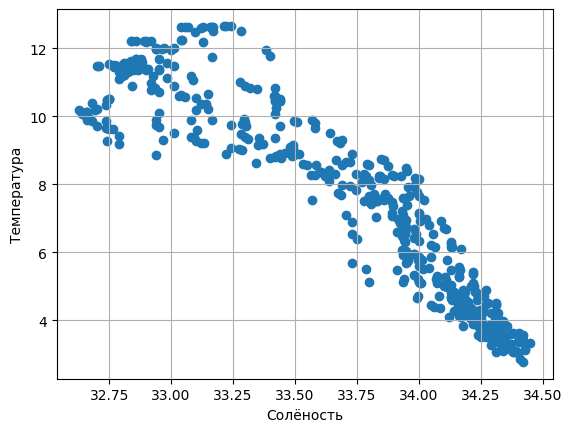

In [ ]:
x = df.Salnty
y = df.T_degC

plt.scatter(x, y)
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.grid()
plt.show()

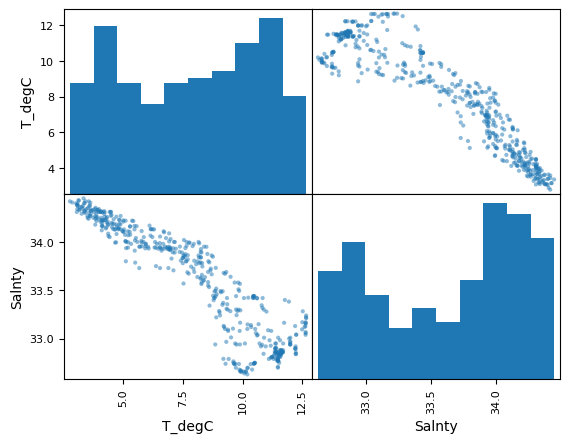

In [ ]:
dg = pd.DataFrame(df, columns=['T_degC','Salnty'])

pd.plotting.scatter_matrix(dg);

3. Generate and graph a linear fit to this data

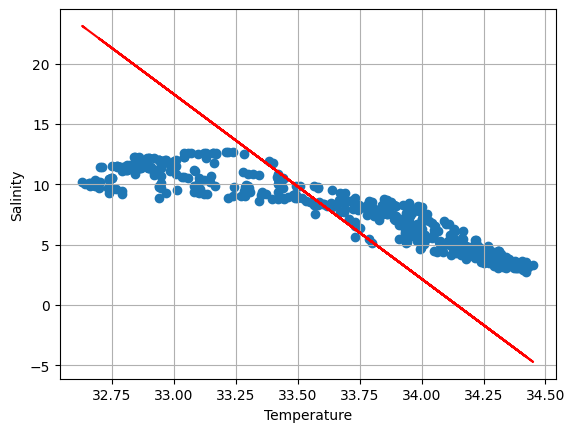

In [ ]:
b = x.cov(y) / x.var()**2
a = y.mean() - b * x.mean()
linApprox = a + b * x

plt.scatter(x, y)
plt.plot(x, linApprox, color = 'red')
plt.xlabel('Temperature')
plt.ylabel('Salinity')
plt.grid()
plt.show()

4. Linear correlation coefficient

In [ ]:
r_xy = b * x.var() / y.var()
r_xy

-0.5665711452626613

5. Coefficient of determination

In [ ]:
r_xy**2

0.3210028626442436

6. Average approximation error

In [ ]:
A = (abs((y-linApprox)/y)).mean()
print(str(100*A) + "%")

79.58306697107315%
